In [2]:
#install required libraries 
!pip install tensorflow opencv-python matplotlib

In [35]:
import tensorflow as tf
import os

#Remove over clocking of GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

import cv2 
import imghdr

#copy the path of 'data' into a variable
data_dir = 'data'

#list of our classes(124)
#os.listdir(data_dir)

#libraries for visualisation 
import numpy as np
from matplotlib import pyplot as plt

#all the specifications that our images will be set to
#tf.keras.utils.image_dataset_from_directory??

data = tf.keras.utils.image_dataset_from_directory('data')

#making an iterator that iterates through the data
data_iterator = data.as_numpy_iterator()

#Batches of 32 created
batch = data_iterator.next()
#len(batch)

#Class number of the 32 images that the batch picked up
#batch[1]

scaled = batch[0]/255

scaled.max()
scaled.min()

data = data.map(lambda x, y:(x/255, y))

scaled_iterator = data.as_numpy_iterator()

batch = scaled_iterator.next()
print(batch[0].max())


Found 258 files belonging to 2 classes.
1.0


In [4]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [36]:
#Data split
print(len(data))
train_size = int(len(data)*0.8)+1
val_size = int(len(data)*0.1)+1
test_size = int(len(data)*0.1)

train_size+val_size+test_size
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

print(len(train) + len(test) + len(val))

9
9


In [37]:
#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense

model = Sequential()

from keras.layers import LSTM,Dense, Flatten

model.add(Conv2D(32, (3,3), 1,activation = 'relu', input_shape = (256,256,3), padding='same'))
model.add(MaxPooling2D(padding = 'same'))

model.add(Conv2D(64,(3,3),1,activation ='relu',padding = 'same'))
model.add(MaxPooling2D(padding = 'same'))

model.add(Conv2D(32,(3,3),1,activation='relu',padding = 'same'))
model.add(MaxPooling2D(padding = 'same'))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

model.summary()

logdir = 'logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)      

In [6]:
#Cleaning data off unaccepted formats
from pathlib import Path
import imghdr

data_dir = "data"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

data\Cat\10404.jpg is not an image
data\Cat\11091.jpg is not an image
data\Cat\11196.jpg is not an image
data\Cat\11602.jpg is not an image
data\Cat\12370.jpg is not an image
data\Cat\1476.jpg is not an image
data\Cat\1483.jpg is not an image
data\Cat\1815.jpg is not an image
data\Cat\2101.jpg is not an image
data\Cat\3089.jpg is not an image
data\Cat\4165.jpg is not an image
data\Cat\5089.jpg is not an image
data\Cat\6438.jpg is not an image
data\Cat\666.jpg is not an image
data\Cat\7245.jpg is not an image
data\Cat\7441.jpg is not an image
data\Cat\7487.jpg is not an image
data\Cat\780.jpg is not an image
data\Cat\8054.jpg is not an image
data\Cat\8157.jpg is not an image
data\Cat\8335.jpg is not an image
data\Cat\925.jpg is not an image
data\Dog\10163.jpg is not an image
data\Dog\10745.jpg is not an image
data\Dog\10949.jpg is not an image
data\Dog\1117.jpg is not an image
data\Dog\11702.jpg is not an image
data\Dog\2339.jpg is not an image
data\Dog\3252.jpg is not an image
data\Dog

In [38]:
hist = model.fit(train, epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 0.8773 - accuracy: 0.5273 - val_loss: 0.5443 - val_accuracy: 1.0000
Epoch 2/20
8/8 [==============================] - 11s 1s/step - loss: 0.6775 - accuracy: 0.5078 - val_loss: 0.7809 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.6553 - accuracy: 0.5547 - val_loss: 0.5779 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 10s 1s/step - loss: 0.6051 - accuracy: 0.6602 - val_loss: 0.5275 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: 0.5483 - accuracy: 0.7305 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 10s 1s/step - loss: 0.4582 - accuracy: 0.7852 - val_loss: 0.5784 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 10s 1s/step - loss: 0.4220 - accuracy: 0.8320 - val_loss: 0.2587 - val_accuracy: 1.0000
Epoch 8/20
8/8 [==================

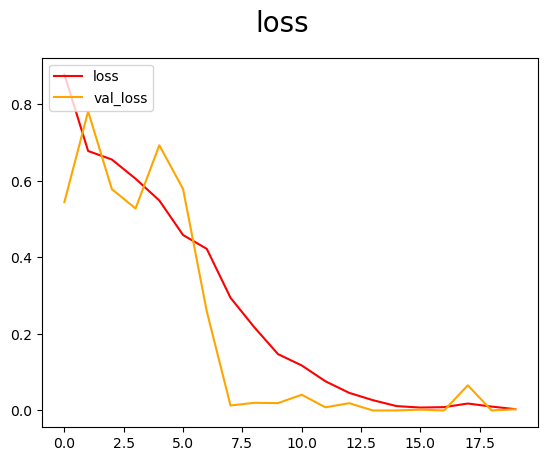

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

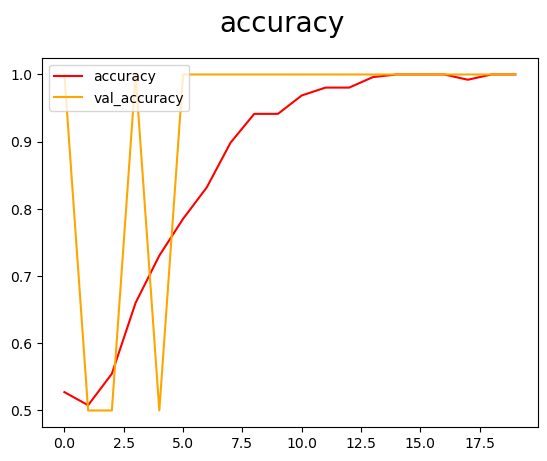

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re= Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 68ms/step
[[0.00014383]]
Predicted Cat


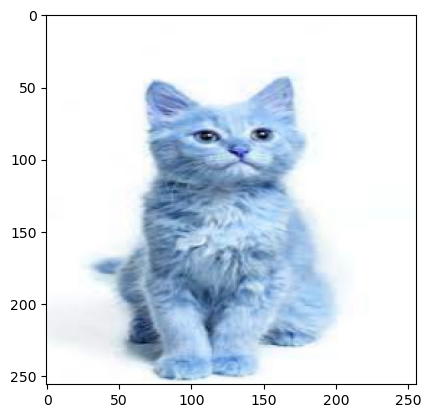

In [44]:
import cv2
img = cv2.imread('Manual test/cattest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
np.expand_dims(resize,0)
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
#prediction
if yhat>0.5:
    print(f'Predicted Dog')
else:
    print(f'Predicted Cat')

1/1 [==============================] - 0s 29ms/step
[[0.99995637]]
Predicted Dog


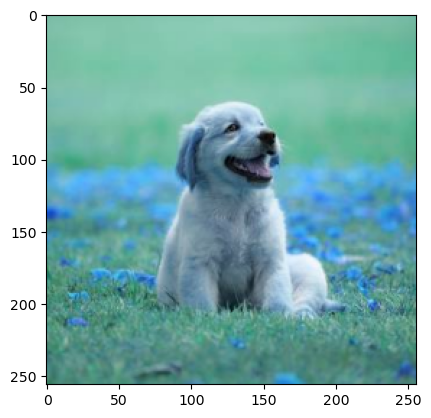

In [46]:
import cv2
img = cv2.imread('Manual test/dogtest.jpg')#Insert image that needs to be predicted
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
np.expand_dims(resize,0)
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
#prediction
if yhat>0.5:
    print(f'Predicted Dog')
else:
    print(f'Predicted Cat')

In [47]:
#saving model
from tensorflow.keras.models import load_model
model.save(os.path.join('models','DogAndCat.h5'))
new_model = load_model(os.path.join('models','DogAndCat.h5'))


In [52]:
#Run the prediction
yhatnew = new_model.predict(np.expand_dims(resize/255,0))
print("Accuracy=",yhatnew)
if yhatnew>0.5:
    print(f'Predicted Dog')
else:
    print(f'Predicted Cat')

1/1 [==============================] - 0s 27ms/step
Accuracy= [[0.99995637]]
Predicted Dog
